# General Linear Models

Working through tons of sci-kit learn models with the Titanic Dataset. This notebook will explore section 1.1 from the [scikit learn user guide](https://scikit-learn.org/stable/modules/linear_model.html)

In [1]:
# Set read-in-data variables

embarked = 'integers-zero'
age = 'baby-zero-other-avg'
sex = 'integer'
fare = 'integer-floor'

# Store variables to pass to other notebook

%store embarked
%store age
%store sex
%store fare

# Run read-in-data notebook

%run ./read-in-data.ipynb

# Read in evaluate predictions methods

%run ./evaluate-predictions.ipynb

%store -r

Stored 'embarked' (str)
Stored 'age' (str)
Stored 'sex' (str)
Stored 'fare' (str)


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

Stored 'X_train' (DataFrame)
Stored 'X_validate' (DataFrame)
Stored 'y_train' (DataFrame)
Stored 'y_validate' (DataFrame)
Stored 'X_test' (DataFrame)


## Results Table 

It seems wise to track each model's performance on a table, let's define one up top.

In [2]:
results = pd.DataFrame(columns=["AUC","BestAccuracy","BestThreshold"])

## Ordinary Least Squares

Fit a linear model with coefficients to minimize the residual sum of squares between observed responses in dataset and results predicted by linear approximation. 

May have trouble with multicolinearity, meaning, if two different features are correlated, it'll f them up.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


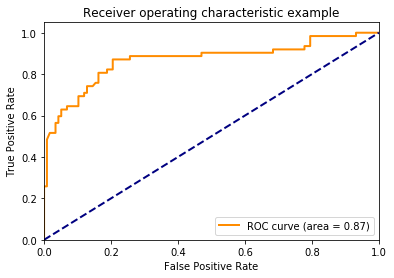

In [3]:
# Train the model

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X_train, y_train)

# Score the model

y_predict = reg.predict(X_validate)

# Evaluate the model

ols = evaluate_predicted_probabilities(y_predict, y_validate['Survived'])

In [5]:
X_validate.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
591,3,0,35,0,0,7,1
132,3,0,20,0,0,7,1
629,3,0,26,0,0,7,1
196,1,1,58,0,0,146,2
231,1,1,35,1,0,83,1


In [8]:
y_predict[:5]

array([[0.07180545],
       [0.15174975],
       [0.11977203],
       [0.89174405],
       [0.89093657]])

In [286]:
print(list(X_train.columns.values))
print(reg.coef_)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
[[-1.72324766e-01  5.03883065e-01 -5.32961975e-03 -4.96475003e-02
  -2.18689005e-02  2.66394982e-04  5.69583558e-02]]


In [287]:
print(reg.intercept_)

[0.71649332]


In [288]:
results = results.append(pd.DataFrame(
        [[np.round(ols[0], 3), np.round(ols[1], 3), ols[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Ordinary Least Squares"]))
print(results)

                          AUC  BestAccuracy  BestThreshold
Ordinary Least Squares  0.869         0.832           0.61


## Ridge Regression

In general, simple models are better than complex models and usually do not overfit. If we can prevent coefficients from getting too big (important), it's a more simple model. 

Ridge Regression is linear regression with a penalty on the size of coefficients. IE, we have an extra parameter, `alpha`, which controls the amount of "shrinkage", ie, how small we want each of the parameters. If we set `alpha` = 0, this is just Ordinary Least Squares. `alpha` = .1 is a tiny penalty. scikit-learn has a default of .5, but in theory, we could scale up alpha arbitarily large, but at some point, you just end up arbitrarily picking the tinest coefficients possible. 

Thus, we'll try a series of alphas here and see how accuracy and AUC changes.


In [289]:
# Just a selection of different alphas: 
alpha=[0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 5, 10, 25, 50, 75, 100, 200, 500, 1000]

# Set champion variables for searching:
b_alpha = 0
b_auc = 0
b_acc = 0
b_thresh = 0

for a in alpha:
    ridge = linear_model.Ridge(alpha=a).fit(X_train, y_train)

    # Score the model
    y_predict = ridge.predict(X_validate)
    # Evaluate the model
    ridge_results = evaluate_predicted_probabilities(y_predict, y_validate['Survived'], print_roc=False)
    print("For alpha = %f, AUC = %f, Best Accuracy = %f with threshold = %f" %
          (a, np.round(ridge_results[0], 6), np.round(ridge_results[1], 6), ridge_results[2]))
    if b_acc < ridge_results[1]:
        b_alpha = a
        b_auc = ridge_results[0]
        b_acc = ridge_results[1]
        b_thresh = ridge_results[2]
        

For alpha = 0.000000, AUC = 0.868831, Best Accuracy = 0.832402 with threshold = 0.610000
For alpha = 0.100000, AUC = 0.868831, Best Accuracy = 0.832402 with threshold = 0.610000
For alpha = 0.250000, AUC = 0.868831, Best Accuracy = 0.832402 with threshold = 0.610000
For alpha = 0.500000, AUC = 0.868831, Best Accuracy = 0.832402 with threshold = 0.610000
For alpha = 0.750000, AUC = 0.868693, Best Accuracy = 0.832402 with threshold = 0.620000
For alpha = 1.000000, AUC = 0.868693, Best Accuracy = 0.832402 with threshold = 0.620000
For alpha = 1.500000, AUC = 0.868831, Best Accuracy = 0.832402 with threshold = 0.620000
For alpha = 2.000000, AUC = 0.868969, Best Accuracy = 0.832402 with threshold = 0.640000
For alpha = 5.000000, AUC = 0.869107, Best Accuracy = 0.832402 with threshold = 0.600000
For alpha = 10.000000, AUC = 0.870485, Best Accuracy = 0.832402 with threshold = 0.560000
For alpha = 25.000000, AUC = 0.873932, Best Accuracy = 0.837989 with threshold = 0.570000
For alpha = 50.0000

In [290]:
results = results.append(pd.DataFrame(
        [[np.round(b_auc, 3), np.round(b_acc, 3), b_thresh]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Ridge Regression, alpha = %f" % (b_alpha)]))
print(results)

                                       AUC  BestAccuracy  BestThreshold
Ordinary Least Squares               0.869         0.832           0.61
Ridge Regression, alpha = 50.000000  0.875         0.844           0.53


### Normalized Ridge Regression

To be fair, we had a large alpha above because we've got not-normalized (between 0 and 1) features. Thus, alpha is arbitrarily large depending on the size of features. I'm betting a 50 for alpha is getting pretty dominated by the fare column. If we normalize the columns, alpha will be between 0 and 1 and help a lot. Let's try that, too. 


In [291]:
# Just a selection of different alphas: 
alpha=[0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 5, 10, 25, 50, 75, 100, 200, 500, 1000]

# Set champion variables for searching:
b_alpha = 0
b_auc = 0
b_acc = 0
b_thresh = 0

for a in alpha:
    ridge = linear_model.Ridge(alpha=a, normalize=True).fit(X_train, y_train)

    # Score the model
    y_predict = ridge.predict(X_validate)
    # Evaluate the model
    ridge_results = evaluate_predicted_probabilities(y_predict, y_validate['Survived'], print_roc=False)
    print("For alpha = %f, AUC = %f, Best Accuracy = %f with threshold = %f" %
          (a, np.round(ridge_results[0], 6), np.round(ridge_results[1], 6), ridge_results[2]))
    if b_acc < ridge_results[1]:
        b_alpha = a
        b_auc = ridge_results[0]
        b_acc = ridge_results[1]
        b_thresh = ridge_results[2]

For alpha = 0.000000, AUC = 0.868831, Best Accuracy = 0.832402 with threshold = 0.610000
For alpha = 0.100000, AUC = 0.869382, Best Accuracy = 0.832402 with threshold = 0.610000
For alpha = 0.250000, AUC = 0.868142, Best Accuracy = 0.832402 with threshold = 0.590000
For alpha = 0.500000, AUC = 0.868969, Best Accuracy = 0.826816 with threshold = 0.510000
For alpha = 0.750000, AUC = 0.869520, Best Accuracy = 0.826816 with threshold = 0.410000
For alpha = 1.000000, AUC = 0.869107, Best Accuracy = 0.832402 with threshold = 0.410000
For alpha = 1.500000, AUC = 0.869245, Best Accuracy = 0.832402 with threshold = 0.400000
For alpha = 2.000000, AUC = 0.869382, Best Accuracy = 0.826816 with threshold = 0.450000
For alpha = 5.000000, AUC = 0.867728, Best Accuracy = 0.832402 with threshold = 0.430000
For alpha = 10.000000, AUC = 0.869107, Best Accuracy = 0.832402 with threshold = 0.420000
For alpha = 25.000000, AUC = 0.870210, Best Accuracy = 0.821229 with threshold = 0.400000
For alpha = 50.0000

Nope, guess not. Let's still add the best. 

In [292]:
results = results.append(pd.DataFrame(
        [[np.round(b_auc, 3), np.round(b_acc, 3), b_thresh]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Normalized Ridge Regression, alpha = %f" % (b_alpha)]))
print(results)

                                                 AUC  BestAccuracy  \
Ordinary Least Squares                         0.869         0.832   
Ridge Regression, alpha = 50.000000            0.875         0.844   
Normalized Ridge Regression, alpha = 0.000000  0.869         0.832   

                                               BestThreshold  
Ordinary Least Squares                                  0.61  
Ridge Regression, alpha = 50.000000                     0.53  
Normalized Ridge Regression, alpha = 0.000000           0.61  


## Lasso Regression 

Ridge Regression does not let coefficients go to zero (which means that a particular feature gets thrown away). Lasso, on the other hand, allows it. We still have an alpha property to check over, and we'll look at the coefficients to see whether some are getting dropped.

In [293]:
# Just a selection of different alphas: 
alpha=[0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 5, 10, 25, 50, 75, 100, 200, 500, 1000]

# Set champion variables for searching:
b_alpha = 0
b_auc = 0
b_acc = 0
b_thresh = 0

for a in alpha:
    lasso = linear_model.Lasso(alpha=a).fit(X_train, y_train)

    # Score the model
    y_predict = lasso.predict(X_validate)
    # Evaluate the model
    lasso_results = evaluate_predicted_probabilities(y_predict, y_validate['Survived'], print_roc=False)
    print("For alpha = %f, AUC = %f, Best Accuracy = %f with threshold = %f" %
          (a, np.round(lasso_results[0], 6), np.round(lasso_results[1], 6), lasso_results[2]))
    if b_acc < ridge_results[1]:
        print("New best model, coefs: ")
        print(lasso.coef_)
        print("for features: ")
        print(list(X_train.columns.values))
        b_alpha = a
        b_auc = lasso_results[0]
        b_acc = lasso_results[1]
        b_thresh = lasso_results[2]

For alpha = 0.100000, AUC = 0.879653, Best Accuracy = 0.832402 with threshold = 0.380000
New best model, coefs: 
[-0.          0.06377947 -0.0018196  -0.         -0.          0.00210653
  0.        ]
for features: 
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
For alpha = 0.250000, AUC = 0.790460, Best Accuracy = 0.787709 with threshold = 0.420000
For alpha = 0.500000, AUC = 0.763510, Best Accuracy = 0.776536 with threshold = 0.410000
For alpha = 0.750000, AUC = 0.763510, Best Accuracy = 0.770950 with threshold = 0.400000
For alpha = 1.000000, AUC = 0.763510, Best Accuracy = 0.770950 with threshold = 0.400000
For alpha = 1.500000, AUC = 0.763510, Best Accuracy = 0.770950 with threshold = 0.400000
For alpha = 2.000000, AUC = 0.763510, Best Accuracy = 0.770950 with threshold = 0.410000
For alpha = 5.000000, AUC = 0.763510, Best Accuracy = 0.754190 with threshold = 0.400000
For alpha = 10.000000, AUC = 0.500000, Best Accuracy = 0.653631 with threshold = 0.400000
For alpha

In [294]:
results = results.append(pd.DataFrame(
        [[np.round(b_auc, 3), np.round(b_acc, 3), b_thresh]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Lasso Regression, alpha = %f" % (b_alpha)]))
print(results)

                                                 AUC  BestAccuracy  \
Ordinary Least Squares                         0.869         0.832   
Ridge Regression, alpha = 50.000000            0.875         0.844   
Normalized Ridge Regression, alpha = 0.000000  0.869         0.832   
Lasso Regression, alpha = 0.100000             0.880         0.832   

                                               BestThreshold  
Ordinary Least Squares                                  0.61  
Ridge Regression, alpha = 50.000000                     0.53  
Normalized Ridge Regression, alpha = 0.000000           0.61  
Lasso Regression, alpha = 0.100000                      0.38  


So, Lasso regression says that Sex + age + Fare is all that matters, and we've got the best AUC yet, with accuracy equivalent to OLS. 

## Elastic Net 

We got a higher accuracy from Ridge and a higher AUC from Lasson. Elastic Net does both things - it allows features to be gone to zero, but also penalizes features that are given too much weight. 

* Ridge did it's thing by minimizing the sum of squares of the weights times alpha (called L2). 
* Lasso did it's thing by minimizing the absolute value of the sum of the weights (called L1), which also allowed weights to go to zero.

Both include a penalty alpha, but by combining, we also need a ratio. If I set the L1 ratio to 0, this is essentially Ridge Regression. If I set L1 to 1, this is just lasso regression. Thus, we'll do our previous list of alphas, and try L1 ratios between .1 and .9.

In [295]:
# Just a selection of different alphas: 
alpha=[0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 5, 10, 25, 50, 75, 100, 200, 500, 1000]
l1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Set champion variables for searching:
b_alpha = 0
b_l1_ratio = 0 
b_auc = 0
b_acc = 0
b_thresh = 0

for a in alpha:
    for l in l1: 
        
        elastic = linear_model.ElasticNet(alpha=a, l1_ratio=l).fit(X_train, y_train)

        # Score the model
        y_predict = elastic.predict(X_validate)
        # Evaluate the model
        elastic_results = evaluate_predicted_probabilities(y_predict, y_validate['Survived'], print_roc=False)
        print("For alpha = %f and L1 Ratio = %f, AUC = %f, Best Accuracy = %f with threshold = %f" %
              (a, l, np.round(elastic_results[0], 6), np.round(elastic_results[1], 6), elastic_results[2]))
        if b_acc < ridge_results[1]:
            b_alpha = a
            b_l1_ratio = l
            b_auc = elastic_results[0]
            b_acc = elastic_results[1]
            b_thresh = elastic_results[2]

For alpha = 0.100000 and L1 Ratio = 0.100000, AUC = 0.879032, Best Accuracy = 0.843575 with threshold = 0.510000
For alpha = 0.100000 and L1 Ratio = 0.200000, AUC = 0.880962, Best Accuracy = 0.837989 with threshold = 0.490000
For alpha = 0.100000 and L1 Ratio = 0.300000, AUC = 0.887579, Best Accuracy = 0.837989 with threshold = 0.390000
For alpha = 0.100000 and L1 Ratio = 0.400000, AUC = 0.887717, Best Accuracy = 0.837989 with threshold = 0.390000
For alpha = 0.100000 and L1 Ratio = 0.500000, AUC = 0.888958, Best Accuracy = 0.837989 with threshold = 0.490000
For alpha = 0.100000 and L1 Ratio = 0.600000, AUC = 0.887579, Best Accuracy = 0.837989 with threshold = 0.480000
For alpha = 0.100000 and L1 Ratio = 0.700000, AUC = 0.890612, Best Accuracy = 0.837989 with threshold = 0.460000
For alpha = 0.100000 and L1 Ratio = 0.800000, AUC = 0.888200, Best Accuracy = 0.832402 with threshold = 0.350000
For alpha = 0.100000 and L1 Ratio = 0.900000, AUC = 0.884478, Best Accuracy = 0.832402 with thre

For alpha = 10.000000 and L1 Ratio = 0.500000, AUC = 0.763510, Best Accuracy = 0.754190 with threshold = 0.400000
For alpha = 10.000000 and L1 Ratio = 0.600000, AUC = 0.500000, Best Accuracy = 0.653631 with threshold = 0.400000
For alpha = 10.000000 and L1 Ratio = 0.700000, AUC = 0.500000, Best Accuracy = 0.653631 with threshold = 0.400000
For alpha = 10.000000 and L1 Ratio = 0.800000, AUC = 0.500000, Best Accuracy = 0.653631 with threshold = 0.400000
For alpha = 10.000000 and L1 Ratio = 0.900000, AUC = 0.500000, Best Accuracy = 0.653631 with threshold = 0.400000
For alpha = 25.000000 and L1 Ratio = 0.100000, AUC = 0.763510, Best Accuracy = 0.770950 with threshold = 0.410000
For alpha = 25.000000 and L1 Ratio = 0.200000, AUC = 0.763510, Best Accuracy = 0.754190 with threshold = 0.400000
For alpha = 25.000000 and L1 Ratio = 0.300000, AUC = 0.500000, Best Accuracy = 0.653631 with threshold = 0.400000
For alpha = 25.000000 and L1 Ratio = 0.400000, AUC = 0.500000, Best Accuracy = 0.653631 

In [296]:
results = results.append(pd.DataFrame(
        [[np.round(b_auc, 3), np.round(b_acc, 3), b_thresh]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["ElasticNet, alpha = %f, L1 = %f" % (b_alpha, b_l1_ratio)]))
print(results)

                                                 AUC  BestAccuracy  \
Ordinary Least Squares                         0.869         0.832   
Ridge Regression, alpha = 50.000000            0.875         0.844   
Normalized Ridge Regression, alpha = 0.000000  0.869         0.832   
Lasso Regression, alpha = 0.100000             0.880         0.832   
ElasticNet, alpha = 0.100000, L1 = 0.100000    0.879         0.844   

                                               BestThreshold  
Ordinary Least Squares                                  0.61  
Ridge Regression, alpha = 50.000000                     0.53  
Normalized Ridge Regression, alpha = 0.000000           0.61  
Lasso Regression, alpha = 0.100000                      0.38  
ElasticNet, alpha = 0.100000, L1 = 0.100000             0.51  


Unfortunately, it just looks like Ridge performs better. Oh well. 

## Logistic Regression

Leaving continuous predictions, Logistic Regression fits a logistic curve (S shaped curve) which represents the probability of each row, given input. It's sort of the same thing we were doing above, but instead of a straight line, we use a much better shape to predict probabilities. 

Stock Logistic Regression from scikit-learn has two different penalties (L1 and L2) to choose between, as well as a C parameter. But first...

From [Stack Overflow](https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul), Regularization is applying a penalty to increasing magnitude of parameter values to reduce overfitting, like what we did with Ridge. Imma follow the [sciki-learn user's guide to Logistic Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py) and test three values of C with both L1 and L2:

In [297]:
b_C = 0
b_l = ''
b_auc = 0
b_acc = 0
b_thresh = 0

# Set regularization parameter
for i, C in enumerate((1, 0.1, 0.01)):
    for j, l in enumerate(('l1', 'l2')):
        logistic = linear_model.LogisticRegression(C=C, penalty=l).fit(X_train, np.ravel(y_train))
        y_predict = logistic.predict(X_validate)
        logistic_results = evaluate_predicted_probabilities(y_predict, y_validate['Survived'], print_roc=False)
        print("For C = %f and penalty = %s, AUC = %f, Best Accuracy = %f with threshold = %f" %
                      (C, l, np.round(logistic_results[0], 6), np.round(logistic_results[1], 6), logistic_results[2]))
        if b_acc < logistic_results[1]:
            b_C = a
            b_l = l
            b_auc = logistic_results[0]
            b_acc = logistic_results[1]
            b_thresh = logistic_results[2]

For C = 1.000000 and penalty = l1, AUC = 0.803074, Best Accuracy = 0.826816 with threshold = 0.000000
For C = 1.000000 and penalty = l2, AUC = 0.803074, Best Accuracy = 0.826816 with threshold = 0.000000
For C = 0.100000 and penalty = l1, AUC = 0.786945, Best Accuracy = 0.815642 with threshold = 0.000000
For C = 0.100000 and penalty = l2, AUC = 0.787428, Best Accuracy = 0.821229 with threshold = 0.000000
For C = 0.010000 and penalty = l1, AUC = 0.663634, Best Accuracy = 0.748603 with threshold = 0.000000
For C = 0.010000 and penalty = l2, AUC = 0.708712, Best Accuracy = 0.787709 with threshold = 0.000000


In [298]:
results = results.append(pd.DataFrame(
        [[np.round(b_auc, 3), np.round(b_acc, 3), b_thresh]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Logistic Regression, C = %f, penalty = %s" % (b_C, b_l)]))
print(results)

                                                      AUC  BestAccuracy  \
Ordinary Least Squares                              0.869         0.832   
Ridge Regression, alpha = 50.000000                 0.875         0.844   
Normalized Ridge Regression, alpha = 0.000000       0.869         0.832   
Lasso Regression, alpha = 0.100000                  0.880         0.832   
ElasticNet, alpha = 0.100000, L1 = 0.100000         0.879         0.844   
Logistic Regression, C = 1000.000000, penalty = l1  0.803         0.827   

                                                    BestThreshold  
Ordinary Least Squares                                       0.61  
Ridge Regression, alpha = 50.000000                          0.53  
Normalized Ridge Regression, alpha = 0.000000                0.61  
Lasso Regression, alpha = 0.100000                           0.38  
ElasticNet, alpha = 0.100000, L1 = 0.100000                  0.51  
Logistic Regression, C = 1000.000000, penalty = l1           0.00 

## Stochastic Gradient Descent

SGD is a simple yet effective way to learn classifiers. It's better at sparse data than other problems, but can handle large datsets. So maybe this won't work well here, considering the small size of data from the Titanic dataset. 

Per scikit-learn's user guide, SGD is efficient and easy to implement, but it requires a number of hyperparameters and its sensitive to "feature scaling", meaning, if one feature has a large swing in values (ie, a series with values [1, 2, 25, 100, 1000, 5000, 20000, 1000000]). 

Thus, we may consider scaling our fare column to prevent it from dominating. 

Let's try a few different versions of SGD, no need to loop.

In [299]:
sgd = linear_model.SGDClassifier(loss="hinge",
                                 penalty="l2",
                                 max_iter = 50,
                                 learning_rate='optimal',
                                 verbose = True).fit(X_train, np.ravel(y_train))
y_predict = sgd.predict(X_validate)
sgd_results = evaluate_predicted_probabilities(y_predict, y_validate['Survived'], print_roc=False)
print("For SGD, AUC = %f, Best Accuracy = %f with threshold = %f" %
                      (np.round(sgd_results[0], 6), np.round(sgd_results[1], 6), sgd_results[2]))

results = results.append(pd.DataFrame(
        [[np.round(sgd_results[0], 3), np.round(sgd_results[1], 3), sgd_results[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Stochastic Gradient Descent, hinge loss, l2 penalty" ]))
print(results)

-- Epoch 1
Norm: 789.45, NNZs: 7, Bias: -67.935012, T: 712, Avg. loss: 7296.649068
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1070.99, NNZs: 7, Bias: -77.170815, T: 1424, Avg. loss: 4147.544535
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1167.65, NNZs: 7, Bias: -77.302975, T: 2136, Avg. loss: 3615.938927
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1110.71, NNZs: 7, Bias: -67.704763, T: 2848, Avg. loss: 2013.302177
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1273.80, NNZs: 7, Bias: -85.639530, T: 3560, Avg. loss: 2759.430353
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1045.74, NNZs: 7, Bias: -59.877776, T: 4272, Avg. loss: 1591.077129
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1312.02, NNZs: 7, Bias: -52.032191, T: 4984, Avg. loss: 1466.931249
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1012.80, NNZs: 7, Bias: -43.127190, T: 5696, Avg. loss: 1631.776501
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 996.76, NNZs: 7, Bias: -3

In [300]:
sgd = linear_model.SGDClassifier(loss="perceptron",
                                 penalty="l2",
                                 max_iter = 50,
                                 learning_rate='optimal',
                                 verbose = True).fit(X_train, np.ravel(y_train))
y_predict = sgd.predict(X_validate)
sgd_results = evaluate_predicted_probabilities(y_predict, y_validate['Survived'], print_roc=False)
print("For SGD, AUC = %f, Best Accuracy = %f with threshold = %f" %
                      (np.round(sgd_results[0], 6), np.round(sgd_results[1], 6), sgd_results[2]))

results = results.append(pd.DataFrame(
        [[np.round(sgd_results[0], 3), np.round(sgd_results[1], 3), sgd_results[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Stochastic Gradient Descent, perceptron loss, elasticnet penalty" ]))
print(results)

-- Epoch 1
Norm: 817.15, NNZs: 7, Bias: -58.518774, T: 712, Avg. loss: 7454.264078
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1369.49, NNZs: 7, Bias: -67.184519, T: 1424, Avg. loss: 5615.615455
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1121.01, NNZs: 7, Bias: -62.824038, T: 2136, Avg. loss: 3084.103180
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1108.33, NNZs: 7, Bias: -38.238393, T: 2848, Avg. loss: 2570.885937
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1105.80, NNZs: 7, Bias: -28.584367, T: 3560, Avg. loss: 1805.513964
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1053.29, NNZs: 7, Bias: -16.709178, T: 4272, Avg. loss: 1498.079333
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1323.71, NNZs: 7, Bias: -11.733104, T: 4984, Avg. loss: 1600.752570
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1032.11, NNZs: 7, Bias: -17.077944, T: 5696, Avg. loss: 1070.563070
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 994.06, NNZs: 7, Bias: -1

In [301]:
sgd = linear_model.SGDClassifier(loss="hinge",
                                 penalty="none",
                                 max_iter = 100,
                                 learning_rate='optimal',
                                 verbose = True).fit(X_train, np.ravel(y_train))
y_predict = sgd.predict(X_validate)
sgd_results = evaluate_predicted_probabilities(y_predict, y_validate['Survived'], print_roc=False)
print("For SGD, AUC = %f, Best Accuracy = %f with threshold = %f" %
                      (np.round(sgd_results[0], 6), np.round(sgd_results[1], 6), sgd_results[2]))

results = results.append(pd.DataFrame(
        [[np.round(sgd_results[0], 3), np.round(sgd_results[1], 3), sgd_results[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Stochastic Gradient Descent, hinge loss, no penalty" ]))
print(results)

-- Epoch 1
Norm: 986.17, NNZs: 7, Bias: -53.984838, T: 712, Avg. loss: 6659.547630
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2323.69, NNZs: 7, Bias: -40.222227, T: 1424, Avg. loss: 3645.893502
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1490.47, NNZs: 7, Bias: 27.928699, T: 2136, Avg. loss: 3145.513090
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1760.93, NNZs: 7, Bias: 27.281109, T: 2848, Avg. loss: 3261.976373
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1882.04, NNZs: 7, Bias: 38.218660, T: 3560, Avg. loss: 2563.288433
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1959.54, NNZs: 7, Bias: 62.047833, T: 4272, Avg. loss: 1175.288884
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2023.43, NNZs: 7, Bias: 61.562404, T: 4984, Avg. loss: 1813.101415
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2069.94, NNZs: 7, Bias: 56.897468, T: 5696, Avg. loss: 1291.766712
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2123.80, NNZs: 7, Bias: 58.1714

Just overfitting the heck out of it, so that's no good.

## Perceptron

Just like SGD above, but no learning rate stuff, not regularized, and only updates itself on mistakes. So maybe better? 


In [302]:
perceptron = linear_model.Perceptron(verbose = 1, max_iter = 50).fit(X_train, np.ravel(y_train))
y_predict = perceptron.predict(X_validate)
perceptron_results = evaluate_predicted_probabilities(y_predict, y_validate['Survived'], print_roc=False)
print("For Perceptron, AUC = %f, Best Accuracy = %f with threshold = %f" %
                      (np.round(perceptron_results[0], 3), np.round(perceptron_results[1], 3), perceptron_results[2]))

results = results.append(pd.DataFrame(
        [[np.round(perceptron_results[0], 3), np.round(perceptron_results[1], 3), perceptron_results[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Perceptron, 50 iterations" ]))
print(results)

-- Epoch 1
Norm: 182.93, NNZs: 7, Bias: -2.000000, T: 712, Avg. loss: 983.233146
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 222.23, NNZs: 7, Bias: 5.000000, T: 1424, Avg. loss: 716.651685
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 308.63, NNZs: 7, Bias: -1.000000, T: 2136, Avg. loss: 969.308989
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 399.35, NNZs: 7, Bias: -4.000000, T: 2848, Avg. loss: 923.832865
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 461.23, NNZs: 7, Bias: 6.000000, T: 3560, Avg. loss: 752.726124
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 542.27, NNZs: 7, Bias: 3.000000, T: 4272, Avg. loss: 721.436798
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 588.21, NNZs: 7, Bias: 9.000000, T: 4984, Avg. loss: 766.140449
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 687.67, NNZs: 7, Bias: 7.000000, T: 5696, Avg. loss: 1075.240169
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 767.95, NNZs: 7, Bias: 4.000000, T: 6408, Avg. loss:

# Make Submission 

Okay, it appears Ridge Regression and Lasson Regression get us the best models. Let's prepare submissions

In [281]:
# Train model Ridge Regression with alpha = 50: 
ridge = linear_model.Ridge(alpha=50).fit(X_train, y_train)

# Create copy of  X_test
ridge_submission = X_test.copy(deep=True)

# Copy probabilities to ridge_submission
ridge_submission['Survived_p'] = ridge.predict(X_test)

# Apply threshold
ridge_submission['Survived'] = ridge_submission.apply(lambda row: 1 if row.Survived_p >= 0.53 else 0, axis = 1)

# Write to .csv file
ridge_submission[['Survived']].to_csv(path_or_buf="data/ridge.csv", 
                        index=True, 
                        header=True )


In [282]:
# Train model Lasso Regression with alpha = 0.1: 
lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)

# Create copy of  X_test
lasso_submission = X_test.copy(deep=True)

# Copy probabilities to ridge_submission
lasso_submission['Survived_p'] = lasso.predict(X_test)

# Apply threshold
lasso_submission['Survived'] = lasso_submission.apply(lambda row: 1 if row.Survived_p >= 0.38 else 0, axis = 1)

# Write to .csv file
lasso_submission[['Survived']].to_csv(path_or_buf="data/lasso.csv", 
                        index=True, 
                        header=True )
